# Working with Data APIs

**Adapted from: Sam Maurer // maurer@berkeley.edu // Oct. 3, 2016**

This notebook provides a demonstration of data-access APIs that operate over the web. See README.md for setup instructions.

In Part 1, we'll load and parse results from an API feed of earthquake data.  
In Part 2, we'll add query parameters to the workflow, using the Google Maps Geolocation API as an example.  
In Part 3, we'll use an authenticated API to query public Twitter posts. 

# Part 1: Reading from an automated data feed

### USGS real-time earthquake feeds

This is an API for near-real-time data about earthquakes. Data is provided in JSON format over the web. No authentication is needed, and there's no way to customize the output. Instead, the API has a separate endpoint for each permutation of the data that users might want.

**API documentation:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php

**Sample API endpoint, for magnitude 4.5+ earthquakes in past day:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_day.geojson  


In [1]:
%matplotlib inline

import pandas as pd

import json    # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [2]:
# download data on magnitude 2.5+ quakes from the past week

endpoint_url = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson"
response = requests.get(endpoint_url)
results = response.text

# what is the data type of the results?
print(type(results))

<class 'str'>


In [3]:
# print the first 500 characters to see a sample of the data

print(results[:500])

{"type":"FeatureCollection","metadata":{"generated":1551808466000,"url":"https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson","title":"USGS Magnitude 2.5+ Earthquakes, Past Week","status":200,"api":"1.7.0","count":264},"features":[{"type":"Feature","properties":{"mag":4.9,"place":"73km WSW of Puerto Madero, Mexico","time":1551801502570,"updated":1551802818040,"tz":-360,"url":"https://earthquake.usgs.gov/earthquakes/eventpage/us1000jaur","detail":"https://earthquake.usgs.go


In [4]:
# it looks like the results are a string with JSON-formatted data inside

# parse the string into a Python dictionary
data = json.loads(results)

print(type(data))

<class 'dict'>


In [5]:
# print the most recent quake

quakes = data['features']
print(quakes[0])

{'type': 'Feature', 'properties': {'mag': 4.9, 'place': '73km WSW of Puerto Madero, Mexico', 'time': 1551801502570, 'updated': 1551802818040, 'tz': -360, 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us1000jaur', 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us1000jaur.geojson', 'felt': None, 'cdi': None, 'mmi': None, 'alert': None, 'status': 'reviewed', 'tsunami': 0, 'sig': 369, 'net': 'us', 'code': '1000jaur', 'ids': ',us1000jaur,', 'sources': ',us,', 'types': ',geoserve,origin,phase-data,', 'nst': None, 'dmin': 1.273, 'rms': 0.73, 'gap': 161, 'magType': 'mb', 'type': 'earthquake', 'title': 'M 4.9 - 73km WSW of Puerto Madero, Mexico'}, 'geometry': {'type': 'Point', 'coordinates': [-92.9988, 14.3631, 24.14]}, 'id': 'us1000jaur'}


In [6]:
# print it more clearly

pp.pprint(quakes[0]['geometry'])
pp.pprint(quakes[0]['properties'])

{'coordinates': [-92.9988, 14.3631, 24.14], 'type': 'Point'}
{'alert': None,
 'cdi': None,
 'code': '1000jaur',
 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us1000jaur.geojson',
 'dmin': 1.273,
 'felt': None,
 'gap': 161,
 'ids': ',us1000jaur,',
 'mag': 4.9,
 'magType': 'mb',
 'mmi': None,
 'net': 'us',
 'nst': None,
 'place': '73km WSW of Puerto Madero, Mexico',
 'rms': 0.73,
 'sig': 369,
 'sources': ',us,',
 'status': 'reviewed',
 'time': 1551801502570,
 'title': 'M 4.9 - 73km WSW of Puerto Madero, Mexico',
 'tsunami': 0,
 'type': 'earthquake',
 'types': ',geoserve,origin,phase-data,',
 'tz': -360,
 'updated': 1551802818040,
 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us1000jaur'}


In [7]:
# pull out the title from each earthquake listing

for q in quakes:
    print(q['properties']['title'])

M 4.9 - 73km WSW of Puerto Madero, Mexico
M 4.4 - 42km W of `Alaqahdari-ye Kiran wa Munjan, Afghanistan
M 3.6 - 71km SSW of Kobuk, Alaska
M 3.5 - 255km SE of Kodiak, Alaska
M 4.8 - 64km SW of Puerto Madero, Mexico
M 5.1 - 60km SW of Buldir Island, Alaska
M 4.8 - 62km SW of Puerto Madero, Mexico
M 2.9 - 8km WSW of Ely, Nevada
M 2.6 - 58km E of Old Iliamna, Alaska
M 4.0 - Izu Islands, Japan region
M 2.5 - 1km S of Bluffdale, Utah
M 3.8 - 121km SSE of Yunaska Island, Alaska
M 2.5 - 52km N of Culebra, Puerto Rico
M 4.6 - 137km WSW of Banda Aceh, Indonesia
M 2.7 - 54km SE of Punta Cana, Dominican Republic
M 2.9 - 127km NNE of Vieques, Puerto Rico
M 2.9 - 65km SSW of Kobuk, Alaska
M 2.6 - 89km S of Kodiak Station, Alaska
M 2.8 - 91km SSW of Kaktovik, Alaska
M 4.5 - 150km NW of Olonkinbyen, Svalbard and Jan Mayen
M 2.6 - 1km NW of Manhattan, Montana
M 2.8 - 71km WSW of Alberto Oviedo Mota, B.C., MX
M 4.4 - 57km ENE of Malili, Indonesia
M 4.5 - 57km NNE of Yanqi, China
M 2.9 - 67km SSW of Kobu

In [8]:
# pull out magnitudes and depths into a Pandas dataframe, using
# a more compact Python syntax for iterating through lists

d = {'magnitude': [q['properties']['mag'] for q in quakes],
     'depth': [q['geometry']['coordinates'][2] for q in quakes]}

df = pd.DataFrame.from_dict(d)

# how many earthquakes were loaded into the dataframe?
print(len(df))

264


In [10]:
# print the first few lines of data

print(df.head())

   magnitude   depth
0        4.9   24.14
1        4.4  120.05
2        3.6   10.00
3        3.5   19.99
4        4.8   39.81


In [11]:
# print some descriptive statistics

print(df.describe())

        magnitude       depth
count  264.000000  264.000000
mean     3.655417   47.426856
std      0.964096   84.580945
min      2.450000   -0.450000
25%      2.800000   10.000000
50%      3.365000   15.445000
75%      4.500000   49.300000
max      7.000000  587.180000


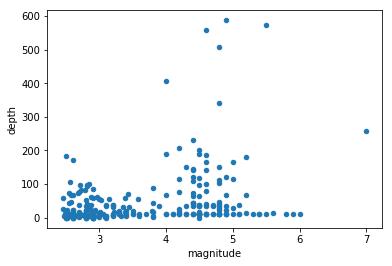

In [12]:
# plot the depth vs. magnitude

df.plot(x='magnitude', y='depth', kind='scatter')

In [13]:
# save the dataframe to disk

df.to_csv('usgs_earthquake_data.csv')

print('file saved')

file saved


In [14]:
# read it back later

new_df = pd.DataFrame.from_csv('usgs_earthquake_data.csv')

print(new_df.head())

   magnitude   depth
0        4.9   24.14
1        4.4  120.05
2        3.6   10.00
3        3.5   19.99
4        4.8   39.81


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  This is separate from the ipykernel package so we can avoid doing imports until


# Part 2: Querying an API endpoint

### Google Maps Geocoding API

Google has lots of APIs that let you access its services through code instead of through GUI apps. This one from Google Maps lets you look up the latitude-longitude coordinates of street addresses.

It works similarly to the earthquakes example, but with query parameters added to the URL endpoint!

**API documentation:**  
https://developers.google.com/maps/documentation/geocoding/intro

**API endpoint:**  
https://maps.googleapis.com/maps/api/geocode/json

**API endpoint with query parameters:**  
https://maps.googleapis.com/maps/api/geocode/json?address=Wurster+Hall

In [ ]:
import json    # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [ ]:
# we have to encode the search query so that it can be passed as a URL, 
# with spaces and other special characters removed

endpoint = 'https://maps.googleapis.com/maps/api/geocode/json'

params = {'address': 'young library uky', 'key':}

url = requests.Request('GET', endpoint, params=params).prepare().url
print(url)

In [ ]:
# download and parse the results

response = requests.get(url)
results = response.text
data = json.loads(results)

print(data)

In [ ]:
# print it more nicely

pp.pprint(data)

In [ ]:
# pull out the lat-lon coordinates

for r in data['results']:
    coords = r['geometry']['location']
    print(coords['lat'], coords['lng'])

### Exercises

1. Search for some other addresses or landmarks!
2. Take a look at the [API documentation](https://developers.google.com/maps/documentation/geocoding/intro). What are the usage limits?

# Part 3: Querying an API with authentication

### Twitter REST APIs

Twitter's APIs also operate over the web, but they require a back-and-forth authentication process at the beginning of each connection. It's easier to have a Python library handle this than to create the query URLs ourselves.

The Twitter "REST" APIs perform stand-alone operations: you submit a query and receive results, like in earlier examples. ([REST](https://en.wikipedia.org/wiki/Representational_state_transfer) is a particular set of guidelines that many APIs follow.) Twitter also has a "streaming" API that continues sending results in real time until you disconnect.

**API documentation:**  
https://dev.twitter.com/rest/public  
https://dev.twitter.com/overview/api/tweets

**Documentation for the Python helper library**:  
https://github.com/geduldig/TwitterAPI

In [16]:
from TwitterAPI import TwitterAPI

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [17]:
# import API credentials from keys.py file in the
# same directory as this notebook

from keys import *

In [18]:
# set up an API connection using credentials from the keys file

api = TwitterAPI(consumer_key, consumer_secret, 
                 access_token, access_token_secret)

print("Connection is set up but not tested")

Connection is set up but not tested


### Making a simple data request

In [19]:
# most recent tweet from @UCBerkeley's timeline

endpoint = 'statuses/user_timeline'
params = {
    'screen_name': 'UKAthletics', 
    'count': 1
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'])

RT @KentuckyMBB: It’s that time. Gotta start getting locked in. Game day starts now. #UKvsOM https://t.co/jbuMQtdKsj


In [20]:
# what other data is there?

pp.pprint(tweet)

{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Mar 05 18:09:19 +0000 2019',
 'entities': {'hashtags': [{'indices': [85, 92], 'text': 'UKvsOM'}],
              'media': [{'display_url': 'pic.twitter.com/jbuMQtdKsj',
                         'expanded_url': 'https://twitter.com/KentuckyMBB/status/1102994479110410241/video/1',
                         'id': 1102994418364223494,
                         'id_str': '1102994418364223494',
                         'indices': [93, 116],
                         'media_url': 'http://pbs.twimg.com/ext_tw_video_thumb/1102994418364223494/pu/img/Nm7fy9c5C8v26wye.jpg',
                         'media_url_https': 'https://pbs.twimg.com/ext_tw_video_thumb/1102994418364223494/pu/img/Nm7fy9c5C8v26wye.jpg',
                         'sizes': {'large': {'h': 720,
                                             'resize': 'fit',
                                             'w': 1280},
                                   'medium': {'h': 675,
    

### Other API endpoints allow different types of searches

In [21]:
# search for public tweets about #BBN

endpoint = 'search/tweets'
params = {
    'q': '#BBN', 
    'count': 5
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

Gameday!
https://t.co/cqfivK2FqK  #BBN #WeAreUK

Congratulations to everyone from @KentuckyWBB who earned All-SEC Basketball honors: https://t.co/N77SIaeVH2 #BBN #poWEr

RT @davebouv1: This year was a dream! @Elitehighlight #BBN https://t.co/UxAWZ3cqCP

RT @KentuckySports: There are multiple ways to get connected to tonight's UK-Mississippi basketball game. They're all here. #BBN https://t.…

RT @KentuckySports: There are multiple ways to get connected to tonight's UK-Mississippi basketball game. They're all here. #BBN https://t.…



In [22]:
# search for public tweets in Hindi

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'lang': 'hi', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

RT @BJP4India: मैं इंतजार अब लम्बा नहीं कर सकता। चुन-चुन के हिसाब लेना मेरी फितरत है।

घर में घुस के मारेंगे। 40 साल से आतंकवाद निर्दोषों…

किसी आंटी के नंग धड़ंग ,कामुकता से लबालब पोस्ट पर जाकर देखो तो सारे हिंदू मुस्लिम एकता के साथ वहाँ लार टपकाते मिलते हैं
#realindia

RT @iPankajShukla: प्रधानमंत्री श्री @narendramodi जी करेंगे PMSYM का शुभारंभ, 10 करोड़ श्रमिकों को मिलेगा फायदा 
#KaamdarKaSamman  https:/…

RT @vssctonline: किसी से भी संबंध जोड़ने से पहले जान ले ये जरूरी बात, संबंधों के विषय में महाराज श्री ने दी बड़ी सीख।
क्या कहा महाराज श्री…

RT @parvezpathon1: 5 मार्च को #भारतबन्द का समर्थन मैं भी करता हूँ लेकिन मेरे कुछ सवाल हैं?

जब #TrippleTalqe बिल संसद भवन में पास होता है,…



In [23]:
# search for public tweets geotagged near the UK campus

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'geocode': '38.034,-84.500,0.5km', 
    'count': 10
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

Students Make the Best Teachers! New BLOG! Students Make the Best Teachers  https://t.co/h4fau911BK

I hope Dr. Everett McCorvey sings the national anthem Saturday at Rupp Arena. He would be perfect for UK Senior Day… https://t.co/4TVMbwQBS0

Madama Butterfly 🦋
#Opera #GNO @ Singletary Center for the Arts https://t.co/XgxZUlBBB5

hbd justin bieber ( michael_rutherford_ ) hope you have the worst day ever cause you deserve it 🥴 swipe for a surpr… https://t.co/cKupMId15q

.@universityofky can you please turn on the heat in the graduate student study? It's hard to write dissertations wi… https://t.co/bzFJSE26lc

Thanks uk_bgpsa !  We want to share to help, sharing is caring!… https://t.co/BmgJMqy09a

*classmate saying she didnt do an assignment due at2*
*me stressin cause i thought it was this class*
her: oh no it… https://t.co/JbMjWEQsRu

#kirkfarms @ Kirkpatrick &amp; Co. https://t.co/OUAuIXoDM2

We are excited to have Shelby Napier and the Royal Spring MS 8th Grade Band for our final si

### Exercises

1. Try some different search queries!
2. Display some more data fields in addition to the tweet text

In [24]:
#Get last 3 tweets from NWS Louisville

endpoint = 'statuses/user_timeline'
params = {
    'screen_name': 'NWSLouisville', 
    'count': 3
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'])

🎉 Fat Tuesday Forecast 🎉 Sunny and clear today, with a chance of flurries this evening. #HappyMardiGras 💜💛💚 https://t.co/9BvOzrlrzT
24 hour rainfall through Tuesday morning. #lmkwx #kywx #inwx https://t.co/32iZ0ai0sM
Severe Weather Awareness Week 

Day 5: Outdoor Safety 🎡🚲

Spending time outdoors? Watch out for thunderstorms!… https://t.co/9abqiBArN4


In [30]:
#Number of retweets on latest @UKAthletics tweet

endpoint = 'statuses/user_timeline'
params = {
    'screen_name': 'UKAthletics', 
    'count': 1
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['retweet_count'])

14


In [40]:
# search for public tweets about #FatTuesday, print source of tweets

endpoint = 'search/tweets'
params = {
    'q': '#FatTuesday', 
    'count': 5
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['source'])

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>


### Bonus: Streaming live tweets in real time 

In [37]:
# Twitter limits simultaneous connections to the streaming API,
# so this part may not work using the demo API keys during class

endpoint = 'statuses/filter'
params = {'locations': '-180,-90,180,90'}
r = api.request(endpoint, params)
LIMIT = 20

# 'enumerate' lets us count tweets as we receive them

for i, tweet in enumerate(r.get_iterator()):
    print(tweet['created_at'])
    print(tweet['place']['full_name'] + ', ' + tweet['place']['country'])
    print(tweet['text'] + '\n')
    if (i > LIMIT): break

# close the streaming connection
r.close()

Tue Mar 05 18:37:05 +0000 2019
Barnet, London, United Kingdom
Girls with no ass are a big no no

Tue Mar 05 18:37:05 +0000 2019
Russian Center of SF, United States
I've been attending the Russian Festival for years, including back when I was D5 Supervisor. In its 31st year, this… https://t.co/QsLeUYbqqj

Tue Mar 05 18:37:05 +0000 2019
Manhattan, NY, United States
@fieldmousemusic andrew or rachel
we'll simply never know

Tue Mar 05 18:37:05 +0000 2019
Los Angeles, CA, United States
@ParkerMolloy Ehh, not me. Dodgers keep breaking my heart

Tue Mar 05 18:37:05 +0000 2019
Henderson, KY, United States
nigga say fuck me he ain't mean it

Tue Mar 05 18:37:05 +0000 2019
Fruitport, MI, United States
I act like everything ok ..... but I really can’t see shit w/o my glasses 😪 I hate being damn near blind

Tue Mar 05 18:37:05 +0000 2019
Recife, Brasil, Brasil
O Rio de Janeiro tem que aprender a fazer carnaval com os Pernambucanos, aqui nossa Polícia é especializada em even… https://t.co/kfGRQIOf

### Exercises for the remainder of class

1. Make a scatter plot of the lat-lon coordinates of earthquakes.  
   &nbsp;
   
2. Using the geocoding example as a starting point, try searching the Google Maps Directions API or Elevation API instead. Descriptions are in the [API documentation](https://developers.google.com/maps/documentation/geocoding/intro).  
   &nbsp;
   

### Exercise 1

In [49]:
#Get coordinates for each earthquake
for q in quakes:
    print(q['geometry']['coordinates'][:2])

[-92.9988, 14.3631]
[70.3039, 35.9883]
[-157.1971, 66.2753]
[-149.2037, 56.2987]
[-92.8947, 14.3637]
[175.2006, 52.0476]
[-92.8923, 14.3854]
[-114.9829, 39.2192]
[-153.892, 59.8368]
[139.3466, 29.2537]
[-111.9436667, 40.4696667]
[-170.2439, 51.5734]
[-65.3945, 18.7721]
[94.1742, 5.097]
[-67.9628, 18.3195]
[-65.56, 19.5501]
[-157.3449, 66.3514]
[-152.801, 56.9717]
[-144.3492, 69.3509]
[-12.0923, 71.7325]
[-111.3514, 45.8675]
[-115.823, 31.9048333]
[121.576, -2.4517]
[86.801, 42.5477]
[-157.2198, 66.3128]
[-149.9963, 61.3153]
[121.4836, -2.4374]
[-108.911, 38.2803333]
[-110.0821667, 44.6931667]
[145.9909, -5.0488]
[-98.4085, 15.8677]
[146.0238, -5.1009]
[108.6615, 53.5647]
[-113.9089, 52.3217]
[146.2135, -5.1779]
[-76.5554, -13.5377]
[146.188, -5.2349]
[-103.2549, 31.1138]
[-80.7041667, 37.8381667]
[-160.9707, 54.7498]
[-27.4671, -56.0893]
[-71.2704, -33.4474]
[-64.0408, 18.6775]
[-155.6123333, 19.4286667]
[-64.5966, 19.4108]
[-65.7343, 19.595]
[-64.996, 19.0666]
[-172.792, -18.0451]
[-6

In [52]:
#Create DataFrame of coordinates
lat_lon = {'lat': [q['geometry']['coordinates'][0] for q in quakes],
     'lon': [q['geometry']['coordinates'][1] for q in quakes]}

df = pd.DataFrame.from_dict(lat_lon)

df.head()

,lat,lon
0,-92.9988,14.3631
1,70.3039,35.9883
2,-157.1971,66.2753
3,-149.2037,56.2987
4,-92.8947,14.3637


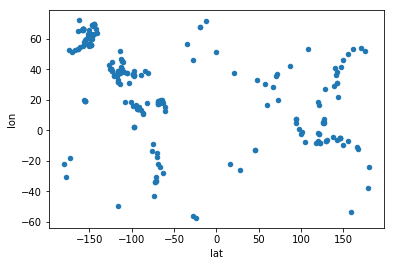

In [53]:
#Plot lat vs. lon
df.plot(x='lat', y='lon', kind='scatter')

### For next time...

In the next class, you will try out another API that provides data you're interested in. You will be asked to try connecting to it using Python code, and performing some basic operations on the data.  To come prepared for next time, please explore some of the transportation-related APIs that may be valuable, and choose one that is of interest to you.

Here are a a few to get you started. 

Public Transit
https://www.programmableweb.com/news/how-smart-cities-are-using-apis-public-transport-apis/2014/05/22

Long-Distance Travel
http://www.olery.com/blog/the-best-travel-apis-discover-contribute/ 

Transportation
https://www.programmableweb.com/category/transportation/api


Start by reading the public transit page, because that provides a nice overview of the types of applications out there, and some of the issues in using them.  These lessons often apply to traffic and transportation more generally.  

Keep in mind that there are a number of different organizations that provide APIs, with different motivations and quality of what is provided.  If it is a private company, what is their business model?  What is the underlying source of the data, and what might that imply about how representative it is of the real world?  There is a ton of stuff out there.  How do we go about sorting out what is useful to us and what is now.  Spend some time exploring these and thinking about these questions.  
